In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from PIL import Image 
from pytesseract import pytesseract 
import os

import numpy as np 
from PIL import Image as im 

import sqlite3

In [6]:
def grayscale(filename):
    img = plt.imread(filename)
    img2 = img[:,:,2]
    img3 = img2.copy()
    shape = img2.shape
    for i in range(shape[0]):
        for j in range(shape[1]):
            if img2[i,j] < 145:
                img3[i,j] = 0
            else:
                img3[i,j] = 255
    
    count = 0
    for i in img3:
        for j in i:
            if j != 255 and j != 0:
                count+=1
                
    print(count)
    
    plt.imshow(img3, cmap="gray")
#     img3.imsave("new"+filename)
    img4 = im.fromarray(img3) 
    img4.save("new"+filename)

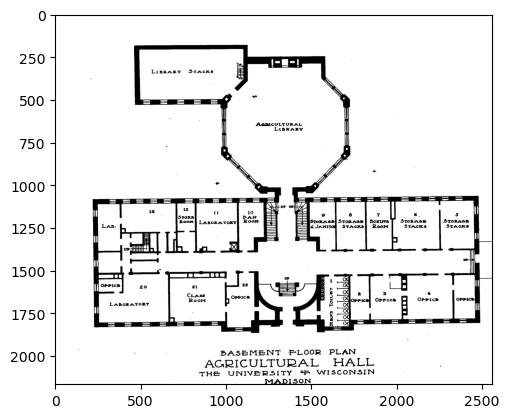

In [68]:
grayscale("image.jpg")

0


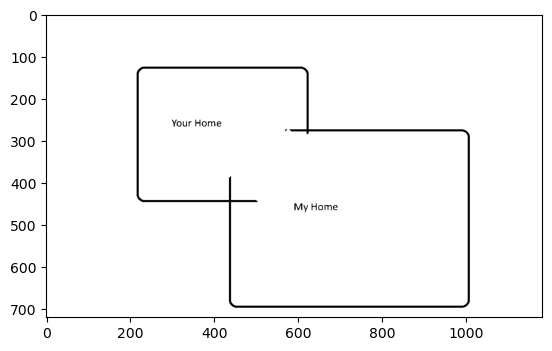

In [7]:
grayscale("test.jpg")

In [ ]:
## img = plt.imread("newtest.jpg")
np.savetxt("more_testing.csv", img, 
              delimiter = ",")

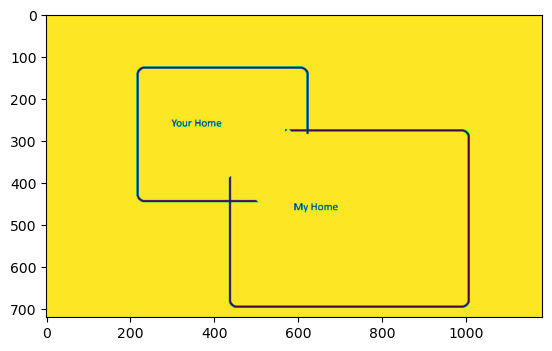

In [78]:
plt.imshow(img)
count = 0
for i in img:
    for j in i:
        if j != 255 and j != 0:
            count+=1

In [79]:
count

17808

In [37]:
image_path = os.path.join("C:\\", "My Data", "Academics", "Madhacks23", "madhacks-project", "image.jpg")
path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

img = Image.open(image_path, 'r') 

pytesseract.tesseract_cmd = path_to_tesseract 

data = pytesseract.image_to_data(image_path)

img.close()

In [38]:
weird_string = re.findall("([\s\S]*)\n$", data)

In [39]:
l = [line.split('\t') for line in weird_string[0].split('\n')]
df = pd.DataFrame(l[1:], columns = l[0])
filtered_df = df[(df['text'] != '') & (df['conf'].astype(float) > 95)]
filtered_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
42,5,1,10,1,1,2,497,1590,40,18,96.632164,20
50,5,1,12,1,1,1,320,1689,232,20,96.046326,LABORATORY
90,5,1,21,1,3,1,1175,634,272,22,95.815979,AGRICULTURAL
92,5,1,21,1,4,1,1285,662,167,22,95.592827,LIBRARY
99,5,1,21,1,7,2,1323,1121,28,15,96.001152,UP
101,5,1,21,1,8,1,930,1155,26,17,96.713455,11
119,5,1,21,1,10,8,2023,1201,150,21,95.188248,STORAGE
120,5,1,21,1,10,9,2274,1199,150,23,95.866722,STORAGE
125,5,1,21,1,11,4,1858,1231,93,22,95.369133,Room
143,5,1,21,1,17,1,803,1589,30,17,96.866165,21


In [66]:
def find_num(string):
    if len(re.findall(r'\d', string)) > 0:
        return True
#     if string.lower() == 'up' or string.lower() == 'down':
#         return True
    return False
#     return True

In [41]:
filtered_df[filtered_df['text'].apply(find_num)][['left', 'top', 'text']]

,left,top,text
42,497,1590,20
99,1323,1121,UP
101,930,1155,11
143,803,1589,21
144,1098,1578,22
152,1773,1629,2
153,1923,1629,3
154,2181,1626,4


In [25]:
image_path = os.path.join("C:\\", "My Data", "Academics", "Madhacks23", "madhacks-project", "image.jpg")
path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
img = Image.open(image_path, 'r') 
pytesseract.tesseract_cmd = path_to_tesseract 
data = pytesseract.image_to_data(image_path)
img.close()
weird_string = re.findall("([\s\S]*)\n$", data)
l = [line.split('\t') for line in weird_string[0].split('\n')]
df = pd.DataFrame(l[1:], columns = l[0])
filtered_df = df[(df['text'] != '') & (df['conf'].astype(float) > 95)]
final_df = filtered_df[filtered_df['text'].apply(find_num)][['left', 'top', 'text']]
final_df = final_df.set_index("text")

In [26]:
sq = sqlite3.connect("database.db")

In [27]:
final_df.to_sql("ag_hall", sq, if_exists='replace')

7

In [32]:
final_df.loc['20']

left     497
top     1590
Name: 20, dtype: object

In [67]:
l = os.listdir("floorplans")
dfs = []
for dirs in l:
    f = os.listdir(os.path.join("floorplans", dirs))
    for file in f:
        image_path = os.path.join("C:\\", "My Data", "Academics", "Madhacks23", "madhacks-project", "floorplans", dirs, file)
        path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
        img = Image.open(image_path, 'r') 
        pytesseract.tesseract_cmd = path_to_tesseract 
        data = pytesseract.image_to_data(image_path)
        img.close()
        weird_string = re.findall("([\s\S]*)\n$", data)
        l = [line.split('\t') for line in weird_string[0].split('\n')]
        df = pd.DataFrame(l[1:], columns = l[0])
        filtered_df = df[(df['text'] != '') & (df['conf'].astype(float) > 95)]
        final_df = filtered_df[filtered_df['text'].apply(find_num)][['left', 'top', 'text']]
        final_df = final_df.set_index("text")
        final_df['floor'] = re.findall(f"{dirs}_(.)\.jpg",file)[0]
        final_df['building'] = dirs
        dfs.append(final_df)

In [68]:
dfs

[      left   top floor building
 text                           
 108   1852  1144     1  ag_hall
 105   2153  1146     1  ag_hall
 104   2396  1325     1  ag_hall
 110    575  1128     1  ag_hall
 109   1015  1121     1  ag_hall
 113    254  1199     1  ag_hall
 114    261  1382     1  ag_hall
 115    465  1628     1  ag_hall
 116    703  1624     1  ag_hall
 117    922  1625     1  ag_hall
 118   1091  1625     1  ag_hall
 103   2458  1644     1  ag_hall,
       left   top floor building
 text                           
 218   1139  1707     2  ag_hall
 210    590  1077     2  ag_hall
 206   2098  1353     2  ag_hall
 153   2264  1387     2  ag_hall
 214    603  1571     2  ag_hall
 202   1736  1565     2  ag_hall
 204   2198  1566     2  ag_hall,
       left   top floor building
 text                           
 310    992   999     3  ag_hall
 305   2246  1166     3  ag_hall
 317    833  1337     3  ag_hall
 300   1203  1345     3  ag_hall
 301   1387  1347     3  ag_hall
 305    

In [69]:
df = pd.concat(dfs, axis = 0)

In [70]:
conn = sqlite3.connect("database.db")

In [64]:
df.to_sql("big_table", conn, if_exists='replace')

184

In [65]:
conn.close()